Animals in Shelters and the effect different parameters have on their outcome.

In [30]:
import pandas as pd
import pygal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
animals = pd.read_csv('train.csv')

In [43]:
data = pd.read_csv('train.csv')

In [44]:
data.head(10)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


In [45]:
data = pd.read_csv('test.csv')

In [46]:
data.head(10)

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White
5,6,Beau,2015-06-23 11:17:00,Dog,Neutered Male,3 years,Beagle Mix,Brown/White
6,7,Bobo,2014-03-12 09:45:00,Cat,Neutered Male,13 years,Domestic Medium Hair Mix,Brown Tabby/White
7,8,Abby,2014-06-25 08:27:00,Cat,Spayed Female,6 months,Domestic Shorthair Mix,Brown Tabby
8,9,Ruby Grace,2014-11-12 18:05:00,Dog,Spayed Female,3 months,Cairn Terrier,Black/Cream
9,10,Ruby,2014-04-07 17:41:00,Dog,Spayed Female,1 year,Pit Bull Mix,Brown/White


In [50]:
plt.style.use('seaborn-deep')

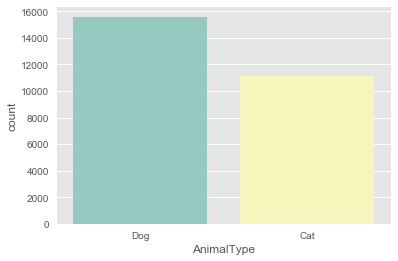

In [51]:
sns.countplot(animals.AnimalType, palette='Set3')


Second we take a look at the distribution 

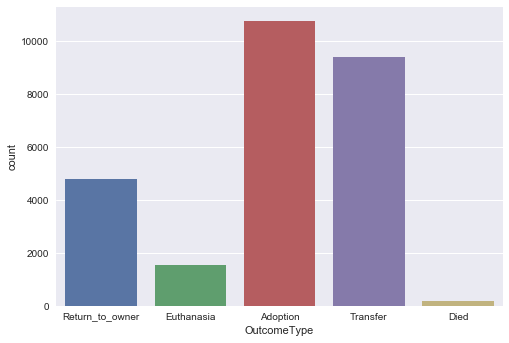

In [53]:
sns.set(style = "darkgrid")
sns.countplot(animals.OutcomeType)

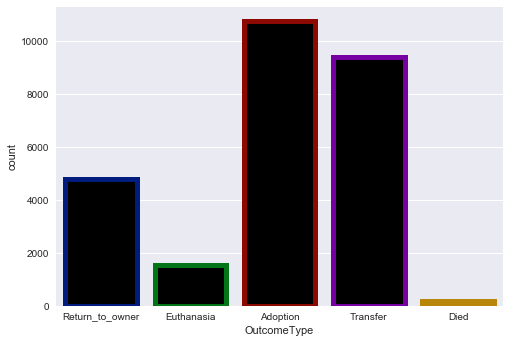

In [60]:
sns.countplot(animals.OutcomeType, facecolor=(0,0,0), linewidth=5, edgecolor=sns.color_palette("dark", 10))

Adoption and transfers are the top outcomes on the above graph. 

In [88]:
fig.savefig('adoption_transfer.png')

In [71]:
# functions to get new parameters from the column
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
def get_neutered(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'unknown'


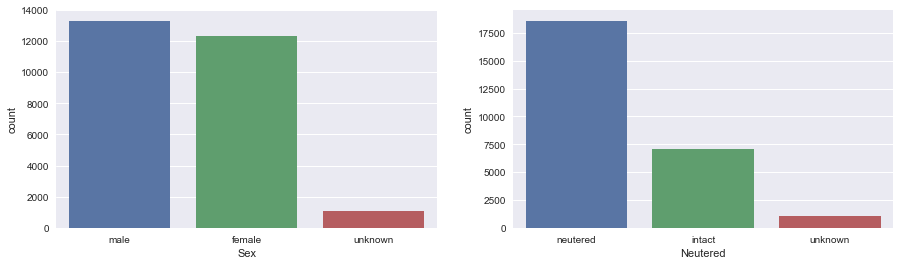

In [77]:
animals['Sex'] = animals.SexuponOutcome.apply(get_sex)
animals['Neutered'] = animals.SexuponOutcome.apply(get_neutered)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.set(style="darkgrid")
sns.countplot(animals.Sex, ax=ax1)
sns.countplot(animals.Neutered, ax=ax2)

These two graphs show that the outcome of wheather an animal is neutered/spayed or intact are really close in comparrison.

We are now going to look at breeds and the effect it has on the animals outcome.

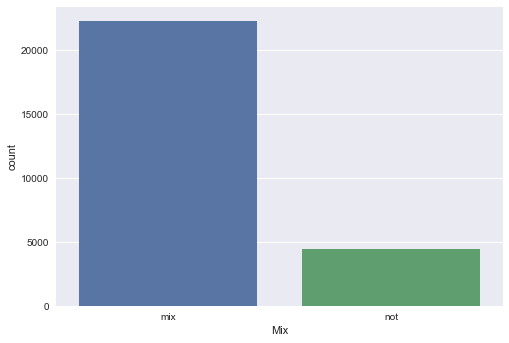

In [78]:
def get_mix(x):
    x = str(x)
    if x.find('Mix') >= 0: return 'mix'
    return 'not'
animals['Mix'] = animals.Breed.apply(get_mix)
sns.set(style="darkgrid")
sns.countplot(animals.Mix)

This graph shows that mix breeds are favored, but we cant only rely on this as most animals in the shelter are labeled as mix breeds. 

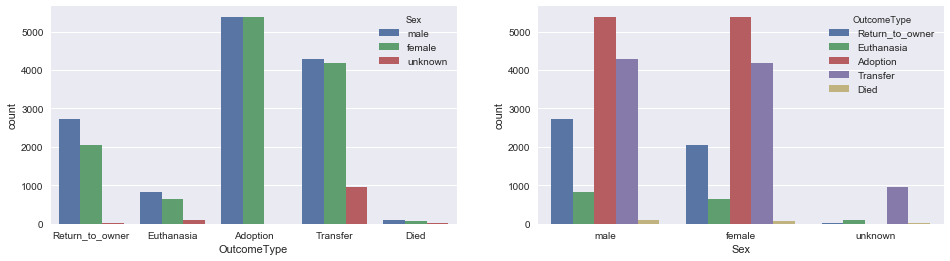

In [79]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='Sex', ax=ax1)
sns.countplot(data=animals, x='Sex',hue='OutcomeType', ax=ax2)

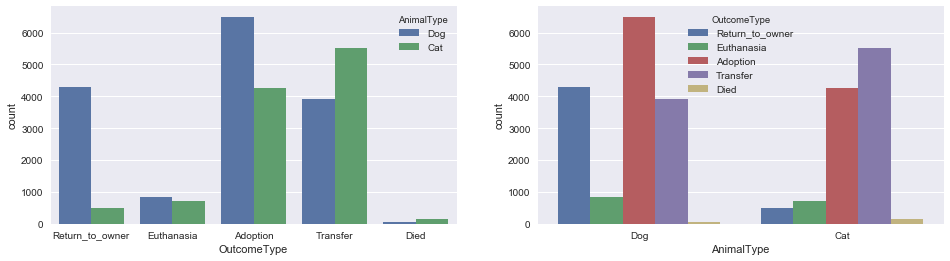

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='AnimalType', ax=ax1)
sns.countplot(data=animals, x='AnimalType',hue='OutcomeType', ax=ax2)

In the above graphs we can see that males and females dogs are even for adoption rate, but when we look at the second set of graphs we see that more dogs are adopted then cats. Cats seem to be transfered more often then adopted.

We also see that dogs have a higher rate of being returned to their owners comapred to cats. 

In [89]:
fig.savefig('dogs_cats.png')

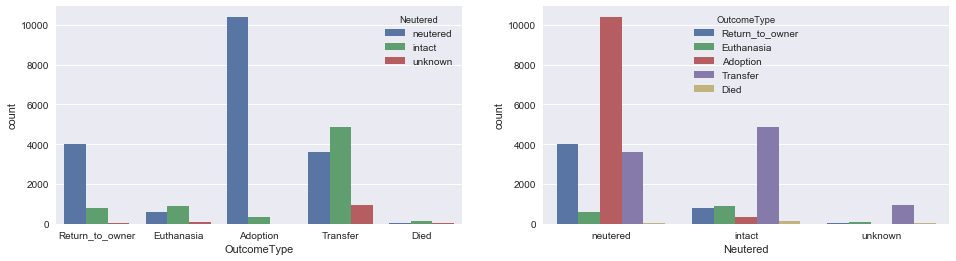

In [81]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='Neutered', ax=ax1)
sns.countplot(data=animals, x='Neutered',hue='OutcomeType', ax=ax2)

Neutered animals have high chaThese two graphs show that neutered/Spayed animals are more likely to be adopted over intact animals.

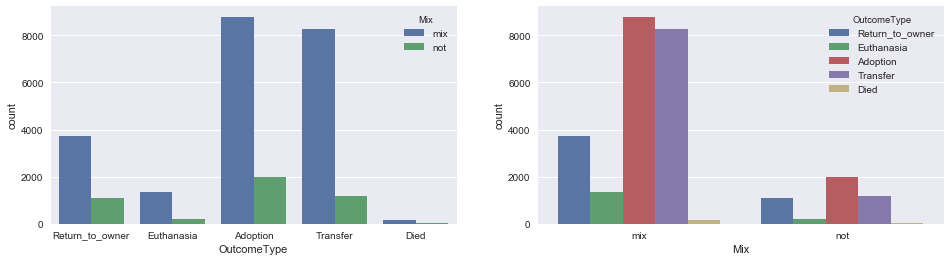

In [82]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='Mix', ax=ax1)
sns.countplot(data=animals, x='Mix',hue='OutcomeType', ax=ax2)

Again we can see that the data is showing that mix breeds seem to be more popular when people are looking to adopt an animal.

The last parameter we can look at is age in years, months, weeks and days. First we are going to calculate the age in years and see what type of effect this has on shelter animals.

In [83]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

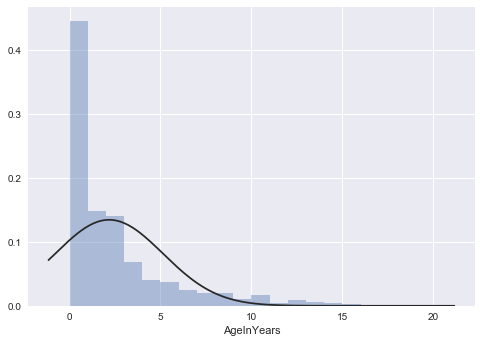

In [85]:
from scipy.stats import norm
animals['AgeInYears'] = animals.AgeuponOutcome.apply(calc_age_in_years)
sns.distplot(animals.AgeInYears, fit=norm, bins = 20, kde=False)

This graph shows us that most animals in the shelter are between 0 and 2 years old.

In [90]:
fig.savefig('age.png')

In [91]:
def calc_age_category(x):
    if x < 3: return 'young'
    if x < 5: return 'young adult'
    if x < 10: return 'adult'
    return 'old'
animals['AgeCategory'] = animals.AgeInYears.apply(calc_age_category)

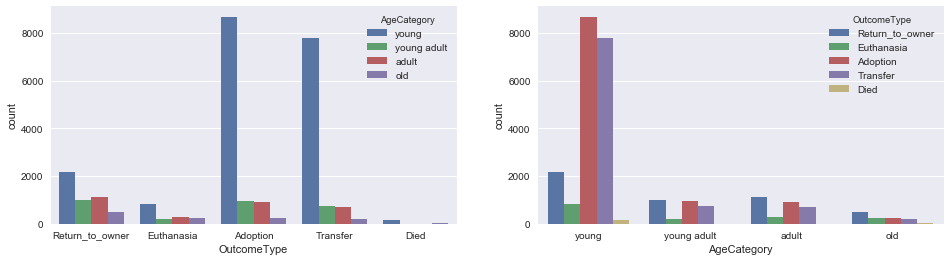

In [92]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='AgeCategory', ax=ax1)
sns.countplot(data=animals, x='AgeCategory',hue='OutcomeType', ax=ax2)

It is not that surprising that younger animals have a higher rate of being adopted and transfered, where as older animals seem to be returned to their owners. 